In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

# Reading the data

In [3]:
Fake_Job = pd.read_csv('C:/Users/sovon/Desktop/Python/ML Datasets/DONE!/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv')
print('Before deleting duplicate values', Fake_Job.shape)
Fake_Job = Fake_Job.drop_duplicates()
print('After deleting duplicate values', Fake_Job.shape)
Fake_Job.head()

Before deleting duplicate values (17880, 18)
After deleting duplicate values (17880, 18)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# EDA

In [4]:
Fake_Job.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17880 entries, 0 to 17879
Data columns (total 18 columns):
job_id                 17880 non-null int64
title                  17880 non-null object
location               17534 non-null object
department             6333 non-null object
salary_range           2868 non-null object
company_profile        14572 non-null object
description            17879 non-null object
requirements           15185 non-null object
benefits               10670 non-null object
telecommuting          17880 non-null int64
has_company_logo       17880 non-null int64
has_questions          17880 non-null int64
employment_type        14409 non-null object
required_experience    10830 non-null object
required_education     9775 non-null object
industry               12977 non-null object
function               11425 non-null object
fraudulent             17880 non-null int64
dtypes: int64(5), object(13)
memory usage: 2.6+ MB


In [5]:
Fake_Job.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

In [6]:
# Removing useless columns
Fake_Job.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [7]:
Fake_Job.drop(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits'], axis=1, inplace=True)

In [8]:
Fake_Job.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [9]:
# Dropping useless columns
Fake_Job.drop('industry',axis=1, inplace=True)

In [10]:
Fake_Job.shape

(17880, 8)

In [11]:
Fake_Job.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent
0,0,1,0,Other,Internship,NaN,Marketing,0
1,0,1,0,Full-time,Not Applicable,NaN,Customer Service,0
2,0,1,0,NaN,NaN,NaN,NaN,0
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Sales,0
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Health Care Provider,0


In [12]:
Fake_Job.isnull().sum()

telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
function               6455
fraudulent                0
dtype: int64

In [13]:
Fake_Job.nunique()

telecommuting           2
has_company_logo        2
has_questions           2
employment_type         5
required_experience     7
required_education     13
function               37
fraudulent              2
dtype: int64

In [14]:
Fake_Job['employment_type'].unique()

array(['Other', 'Full-time', nan, 'Part-time', 'Contract', 'Temporary'],
      dtype=object)

In [15]:
# Treating the missing values
modeValue = Fake_Job['employment_type'].mode()[0]
Fake_Job['employment_type'].fillna(modeValue,inplace=True)
Fake_Job['required_experience'].fillna(Fake_Job['required_experience'].mode()[0], inplace=True)
Fake_Job['required_education'].interpolate(method='ffill', inplace=True)
Fake_Job['function'].interpolate(method='bfill', inplace=True)

In [16]:
Fake_Job.isnull().sum()

telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     3
function               0
fraudulent             0
dtype: int64

In [17]:
Fake_Job.nunique()

telecommuting           2
has_company_logo        2
has_questions           2
employment_type         5
required_experience     7
required_education     13
function               37
fraudulent              2
dtype: int64

In [18]:
Fake_Job['employment_type'].unique()

array(['Other', 'Full-time', 'Part-time', 'Contract', 'Temporary'],
      dtype=object)

In [19]:
employment_type_Mapping = {'Other':4, 'Full-time':3, 'Part-time':2, 'Contract':1, 'Temporary':0}
Fake_Job['employment_type'] = Fake_Job['employment_type'].map(employment_type_Mapping)

In [20]:
Fake_Job.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent
0,0,1,0,4,Internship,NaN,Marketing,0
1,0,1,0,3,Not Applicable,NaN,Customer Service,0
2,0,1,0,3,Mid-Senior level,NaN,Sales,0
3,0,1,0,3,Mid-Senior level,Bachelor's Degree,Sales,0
4,0,1,1,3,Mid-Senior level,Bachelor's Degree,Health Care Provider,0


In [21]:
Fake_Job['required_experience'].unique()

array(['Internship', 'Not Applicable', 'Mid-Senior level', 'Associate',
       'Entry level', 'Executive', 'Director'], dtype=object)

In [22]:
required_experience_Mapping = {'Internship':1, 'Not Applicable':0, 'Mid-Senior level':4, 'Associate':5,
       'Entry level':2, 'Executive':3, 'Director':6}
Fake_Job['required_experience'] = Fake_Job['required_experience'].map(required_experience_Mapping)

In [23]:
%matplotlib inline

In [24]:
def DistributionOfCat(inpdata, SelectedCols):
    import matplotlib.pyplot as plt
    fig, subplot = plt.subplots(nrows=len(SelectedCols), ncols=1, figsize=(5,30))
    for colName, plotNumber in zip(SelectedCols, range(len(SelectedCols))):
        inpdata.groupby(colName).size().plot.bar(ax = subplot[plotNumber])

In [25]:
Fake_Job.columns

Index(['telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'function', 'fraudulent'],
      dtype='object')

## Checking the distributions of all variables

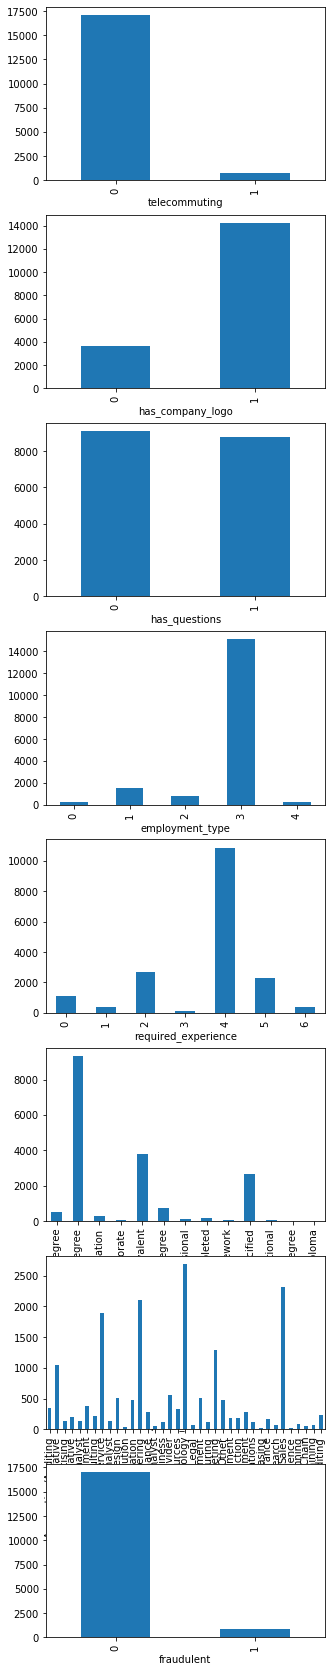

In [26]:
DistributionOfCat(Fake_Job, SelectedCols=['telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'function', 'fraudulent'])

## Bucketing

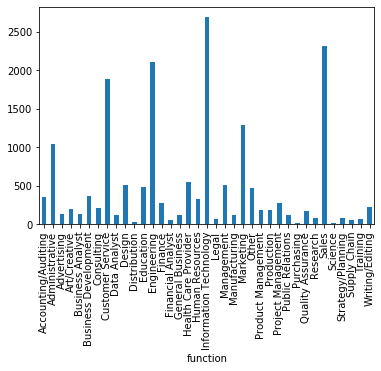

In [28]:
Fake_Job.groupby('function').size().plot.bar()

In [31]:
Fake_Job['function'].unique()

array(['Marketing', 'Customer Service', 'Sales', 'Health Care Provider',
       'Management', 'Information Technology', 'Other', 'Engineering',
       'Administrative', 'Design', 'Production', 'Education',
       'Supply Chain', 'Business Development', 'Product Management',
       'Financial Analyst', 'Consulting', 'Human Resources',
       'Project Management', 'Manufacturing', 'Public Relations',
       'Strategy/Planning', 'Advertising', 'Finance', 'General Business',
       'Research', 'Accounting/Auditing', 'Art/Creative',
       'Quality Assurance', 'Data Analyst', 'Business Analyst',
       'Writing/Editing', 'Distribution', 'Science', 'Training',
       'Purchasing', 'Legal'], dtype=object)

In [32]:
MapFunction = {'Marketing':0, 'Customer Service':1, 'Sales':2, 'Health Care Provider':3,
       'Management':4, 'Information Technology':5, 'Other':6, 'Engineering':7,
       'Administrative':8, 'Design':9, 'Production':10, 'Education':11,
       'Supply Chain':12, 'Business Development':13, 'Product Management':14,
       'Financial Analyst':15, 'Consulting':16, 'Human Resources':17,
       'Project Management':18, 'Manufacturing':19, 'Public Relations':20,
       'Strategy/Planning':21, 'Advertising':22, 'Finance':23, 'General Business':24,
       'Research':25, 'Accounting/Auditing':26, 'Art/Creative':27,
       'Quality Assurance':28, 'Data Analyst':29, 'Business Analyst':30,
       'Writing/Editing':31, 'Distribution':32, 'Science':33, 'Training':34,
       'Purchasing':35, 'Legal':36}
Fake_Job['function'] = Fake_Job['function'].map(MapFunction)

In [33]:
Fake_Job['function'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36], dtype=int64)

In [34]:
custom_bucket = np.linspace(0,10,5)
custom_bucket

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [35]:
Fake_Job['binned_function'] = pd.cut(Fake_Job['function'], custom_bucket, labels=[1,2,3,4])

In [36]:
Fake_Job['function'].head(10)

0    0
1    1
2    2
3    2
4    3
5    4
6    4
7    1
8    1
9    1
Name: function, dtype: int64

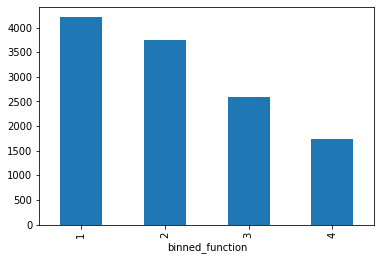

In [37]:
Fake_Job.groupby('binned_function').size().plot.bar()

In [27]:
CrossTabResult = pd.crosstab(columns=Fake_Job['fraudulent'], index=Fake_Job['function'])
CrossTabResult

fraudulent,0,1
function,,
Accounting/Auditing,293,58
Administrative,854,193
Advertising,123,11
Art/Creative,191,3
Business Analyst,128,1
Business Development,353,18
Consulting,201,7
Customer Service,1799,94
Data Analyst,122,4


In [28]:
def RelationCatvsCat(inpData, SelectedCols, Target):
    import matplotlib.pyplot as plt
    import pandas as pd
    fig, subplot = plt.subplots(nrows=len(SelectedCols), ncols=1, figsize=(5,30))
    for colName, plotNumber in zip(SelectedCols, range(len(SelectedCols))):
        CrossTabResult = pd.crosstab(columns=inpData[Target], index=inpData[colName])
        CrossTabResult.plot.bar(ax = subplot[plotNumber])

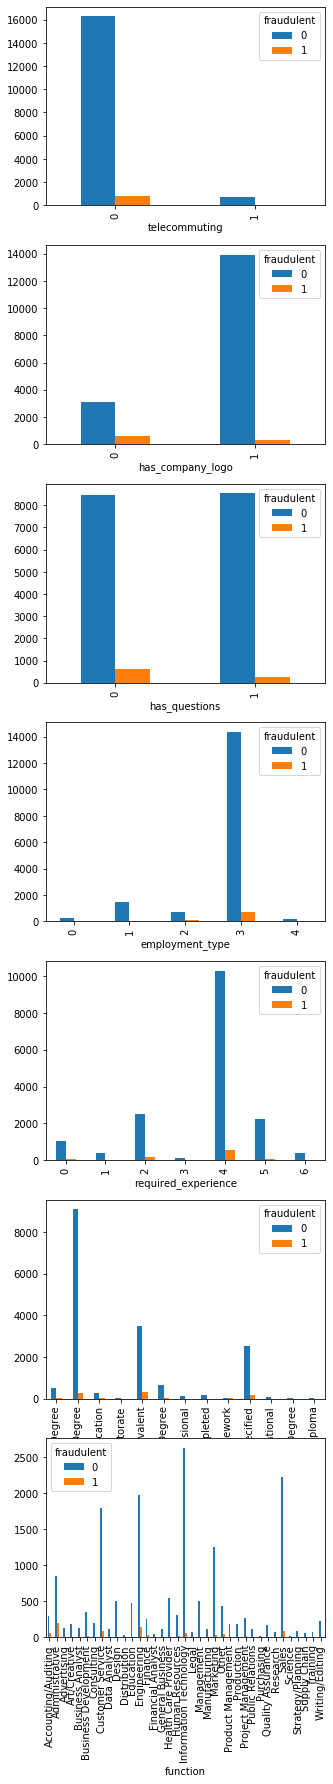

In [29]:
RelationCatvsCat(Fake_Job, SelectedCols=['telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'function'], Target='fraudulent')

In [30]:
from scipy.stats import chi2_contingency
anova = chi2_contingency(CrossTabResult)

In [31]:
anova[1]

1.1832994727542267e-137

In [32]:
def anovaTest(inpData, SelectedCols, Target):
    from scipy.stats import chi2_contingency
    for colName in SelectedCols:
        CrossTabResult = pd.crosstab(columns=inpData[Target], index=inpData[colName])
        Anova = chi2_contingency(CrossTabResult)
        print(Anova[1])
        if(Anova[1]>0.05):
            print('Not Correlated')
        else:
            print('Correlated')

In [33]:
anovaTest(Fake_Job, SelectedCols=['telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'function'], Target='fraudulent')

5.88986891319539e-06
Correlated
3.5943691337772625e-268
Correlated
2.515984961488263e-34
Correlated
1.4137171764056655e-11
Correlated
1.9254943573222032e-13
Correlated
4.093808292653645e-106
Correlated
1.1832994727542267e-137
Correlated


In [34]:
Fake_Job.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent
0,0,1,0,4,1,NaN,Marketing,0
1,0,1,0,3,0,NaN,Customer Service,0
2,0,1,0,3,4,NaN,Sales,0
3,0,1,0,3,4,Bachelor's Degree,Sales,0
4,0,1,1,3,4,Bachelor's Degree,Health Care Provider,0


In [35]:
Fake_Job['required_education'].unique()

array([nan, "Bachelor's Degree", "Master's Degree",
       'High School or equivalent', 'Unspecified',
       'Some College Coursework Completed', 'Vocational', 'Certification',
       'Associate Degree', 'Professional', 'Doctorate',
       'Some High School Coursework', 'Vocational - Degree',
       'Vocational - HS Diploma'], dtype=object)

In [36]:
Fake_JobDataNumeric = pd.get_dummies(Fake_Job)

In [37]:
Fake_JobDataNumeric.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,fraudulent,required_education_Associate Degree,required_education_Bachelor's Degree,required_education_Certification,required_education_Doctorate,...,function_Public Relations,function_Purchasing,function_Quality Assurance,function_Research,function_Sales,function_Science,function_Strategy/Planning,function_Supply Chain,function_Training,function_Writing/Editing
0,0,1,0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,3,4,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,3,4,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,1,3,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
Fake_JobDataNumeric.shape

(17880, 56)

In [39]:
Fake_JobDataNumeric.columns

Index(['telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'fraudulent',
       'required_education_Associate Degree',
       'required_education_Bachelor's Degree',
       'required_education_Certification', 'required_education_Doctorate',
       'required_education_High School or equivalent',
       'required_education_Master's Degree', 'required_education_Professional',
       'required_education_Some College Coursework Completed',
       'required_education_Some High School Coursework',
       'required_education_Unspecified', 'required_education_Vocational',
       'required_education_Vocational - Degree',
       'required_education_Vocational - HS Diploma',
       'function_Accounting/Auditing', 'function_Administrative',
       'function_Advertising', 'function_Art/Creative',
       'function_Business Analyst', 'function_Business Development',
       'function_Consulting', 'function_Customer Service',
       'function_Data Analy

In [40]:
def anovaTest(inpData, SelectedCols, Target):
    from scipy.stats import chi2_contingency
    for colName in SelectedCols:
        CrossTabResult = pd.crosstab(columns=inpData[Target], index=inpData[colName])
        Anova = chi2_contingency(CrossTabResult)
        print(Anova[1])
        if(Anova[1]>0.05):
            print(colName, 'Not Correlated')
        else:
            print('Correlated')

In [41]:
anovaTest(Fake_JobDataNumeric, SelectedCols=['required_education_Associate Degree',
       '''required_education_Bachelor's Degree''',
       'required_education_Certification', 'required_education_Doctorate',
       'required_education_High School or equivalent',
       '''required_education_Master's Degree''', 'required_education_Professional',
       'required_education_Some College Coursework Completed',
       'required_education_Some High School Coursework',
       'required_education_Unspecified', 'required_education_Vocational',
       'required_education_Vocational - Degree',
       'required_education_Vocational - HS Diploma',
       'function_Accounting/Auditing', 'function_Administrative',
       'function_Advertising', 'function_Art/Creative',
       'function_Business Analyst', 'function_Business Development',
       'function_Consulting', 'function_Customer Service',
       'function_Data Analyst', 'function_Design', 'function_Distribution',
       'function_Education', 'function_Engineering', 'function_Finance',
       'function_Financial Analyst', 'function_General Business',
       'function_Health Care Provider', 'function_Human Resources',
       'function_Information Technology', 'function_Legal',
       'function_Management', 'function_Manufacturing', 'function_Marketing',
       'function_Other', 'function_Product Management', 'function_Production',
       'function_Project Management', 'function_Public Relations',
       'function_Purchasing', 'function_Quality Assurance',
       'function_Research', 'function_Sales', 'function_Science',
       'function_Strategy/Planning', 'function_Supply Chain',
       'function_Training', 'function_Writing/Editing'], Target='fraudulent')

0.033444186249115354
Correlated
1.015836360513021e-43
Correlated
0.005713179683221855
Correlated
0.5973486226487004
required_education_Doctorate Not Correlated
2.700238437545094e-31
Correlated
0.008454765971354762
Correlated
0.6127210715436573
required_education_Professional Not Correlated
0.7177556309655415
required_education_Some College Coursework Completed Not Correlated
3.8612086121669385e-64
Correlated
0.003342712098013922
Correlated
0.08062331721016883
required_education_Vocational Not Correlated
0.9207071834308963
required_education_Vocational - Degree Not Correlated
0.6531953460790354
required_education_Vocational - HS Diploma Not Correlated
2.7072394634358486e-24
Correlated
3.02181239437184e-98
Correlated
0.10531332566377719
function_Advertising Not Correlated
0.047406866061228556
Correlated
0.05066516659280936
function_Business Analyst Not Correlated
0.908746656020995
function_Business Development Not Correlated
0.4029784790148969
function_Consulting Not Correlated
0.8372337

In [42]:
Fake_JobDataNumeric.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,fraudulent,required_education_Associate Degree,required_education_Bachelor's Degree,required_education_Certification,required_education_Doctorate,...,function_Public Relations,function_Purchasing,function_Quality Assurance,function_Research,function_Sales,function_Science,function_Strategy/Planning,function_Supply Chain,function_Training,function_Writing/Editing
0,0,1,0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,3,4,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,3,4,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,1,3,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
Predictors = ['required_education_Associate Degree',
       '''required_education_Bachelor's Degree''',
       'required_education_Certification', 'required_education_Doctorate',
       'required_education_High School or equivalent',
       '''required_education_Master's Degree''', 'required_education_Professional',
       'required_education_Some College Coursework Completed',
       'required_education_Some High School Coursework',
       'required_education_Unspecified', 'required_education_Vocational',
       'required_education_Vocational - Degree',
       'required_education_Vocational - HS Diploma',
       'function_Accounting/Auditing', 'function_Administrative',
       'function_Advertising', 'function_Art/Creative',
       'function_Business Analyst', 'function_Business Development',
       'function_Consulting', 'function_Customer Service',
       'function_Data Analyst', 'function_Design', 'function_Distribution',
       'function_Education', 'function_Engineering', 'function_Finance',
       'function_Financial Analyst', 'function_General Business',
       'function_Health Care Provider', 'function_Human Resources',
       'function_Information Technology', 'function_Legal',
       'function_Management', 'function_Manufacturing', 'function_Marketing',
       'function_Other', 'function_Product Management', 'function_Production',
       'function_Project Management', 'function_Public Relations',
       'function_Purchasing', 'function_Quality Assurance',
       'function_Research', 'function_Sales', 'function_Science',
       'function_Strategy/Planning', 'function_Supply Chain',
       'function_Training', 'function_Writing/Editing']
Target = ['fraudulent']
X = Fake_JobDataNumeric[Predictors].values
y = Fake_JobDataNumeric[Target].values

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (13410, 50)
Number transactions y_train dataset:  (13410, 1)
Number transactions X_test dataset:  (4470, 50)
Number transactions y_test dataset:  (4470, 1)


In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 5, penalty='l1', solver='liblinear')
lrRegModel = lr.fit(X_train, y_train)
lrPrediction = lrRegModel.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test, lrPrediction))
print(metrics.confusion_matrix(y_test, lrPrediction))

C:\Users\sovon\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4247
           1       0.58      0.03      0.06       223

    accuracy                           0.95      4470
   macro avg       0.77      0.52      0.52      4470
weighted avg       0.93      0.95      0.93      4470

[[4242    5]
 [ 216    7]]


In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10, criterion='entropy')
dtRegModel = dt.fit(X_train, y_train)
dtPrediction = dtRegModel.predict(X_test)
print(metrics.classification_report(y_test, dtPrediction))
print(metrics.confusion_matrix(y_test, dtPrediction))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4247
           1       0.58      0.03      0.06       223

    accuracy                           0.95      4470
   macro avg       0.77      0.52      0.52      4470
weighted avg       0.93      0.95      0.93      4470

[[4242    5]
 [ 216    7]]


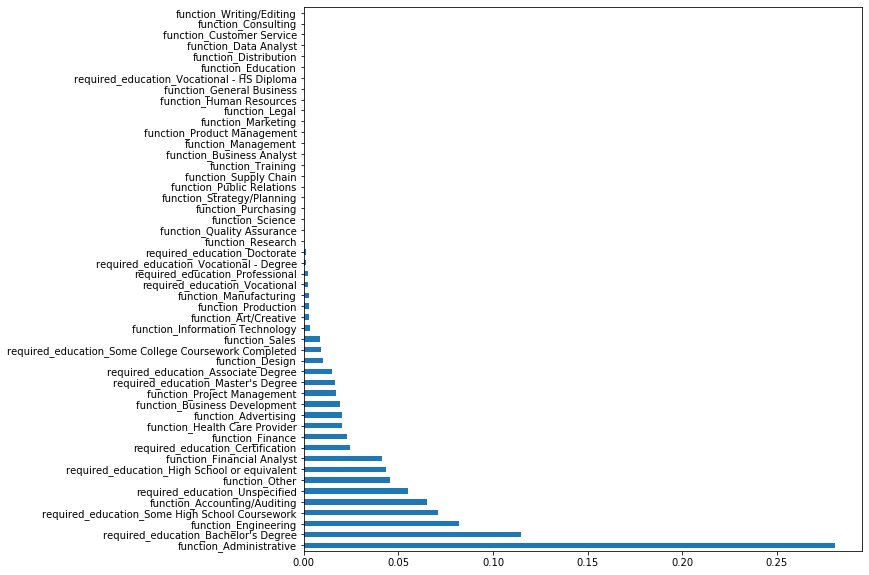

In [47]:
feature_importances = pd.Series(dtRegModel.feature_importances_, index=Predictors)
feature_importances.nlargest(50).plot(kind = 'barh', figsize=(10,10))

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=4, n_estimators=200)
rfRegModel = rf.fit(X_train, y_train)
rfPrediction = rfRegModel.predict(X_test)
print(metrics.classification_report(y_test, rfPrediction))
print(metrics.confusion_matrix(y_test, rfPrediction))

C:\Users\sovon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4247
           1       0.00      0.00      0.00       223

    accuracy                           0.95      4470
   macro avg       0.48      0.50      0.49      4470
weighted avg       0.90      0.95      0.93      4470

[[4247    0]
 [ 223    0]]


C:\Users\sovon\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=1)
ab = AdaBoostClassifier(learning_rate=0.5, n_estimators=500, base_estimator=dt)
abRegModel = ab.fit(X_train, y_train)
abPrediction = abRegModel.predict(X_test)
print(metrics.classification_report(y_test, abPrediction))
print(metrics.confusion_matrix(y_test, abPrediction))

C:\Users\sovon\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4247
           1       0.58      0.03      0.06       223

    accuracy                           0.95      4470
   macro avg       0.77      0.52      0.52      4470
weighted avg       0.93      0.95      0.93      4470

[[4242    5]
 [ 216    7]]


In [50]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.2, booster='gbtree', max_depth=5, n_estimators=100)
xgbRegModel = xgb.fit(X_train, y_train)
xgbPrediction = xgbRegModel.predict(X_test)
print(metrics.classification_report(y_test, xgbPrediction))
print(metrics.confusion_matrix(y_test, xgbPrediction))

C:\Users\sovon\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4247
           1       0.58      0.03      0.06       223

    accuracy                           0.95      4470
   macro avg       0.77      0.52      0.52      4470
weighted avg       0.93      0.95      0.93      4470

[[4242    5]
 [ 216    7]]


In [51]:
from sklearn.model_selection import cross_val_score

In [53]:
accuracy_values = cross_val_score(xgbRegModel, X,y,cv=10, scoring='f1_weighted')
print(accuracy_values)
print('Final accuracy values', accuracy_values.mean())

C:\Users\sovon\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[0.92844497 0.92981678 0.9278857  0.92844497 0.94510551 0.92734053
 0.9351501  0.92811628 0.93033898 0.92899188]
Final accuracy values 0.9309635692754602


In [55]:
FinalXGBModel = xgbRegModel.fit(X,y.ravel())

In [57]:
import pickle
with open('FinalXGBModel.pkl', 'wb') as FileWriteStream:
    pickle.dump(FinalXGBModel, FileWriteStream)
    FileWriteStream.close()

In [67]:
def predictFakeJob(inputDetails):
    with open('FinalXGBModel.pkl', 'rb') as fileReadStream:
        XGB_reg_Model = pickle.load(fileReadStream)
        fileReadStream.close()
    prediction = XGB_reg_Model.predict(inputDetails)
    predictedStatus = pd.DataFrame(prediction, columns=['Predictedvalue'])
    return(predictedStatus)

In [69]:
predictFakeJob(X[0:10])

,Predictedvalue
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
